# Inteligencia Artificial

## Red Neuronal de Señales de trafico

## Rodriguez Rivas Jose Gabriel

## Zamora Guerrero Jose Angel


In [29]:
import tensorflow as tf
import os
import skimage.io as imd
import numpy as np
import matplotlib.pyplot as plt
import random
import imageio

In [7]:
def load_ml_data(data_directory):
    dirs = [d for d in os.listdir(data_directory)
        #Listar los directorios
        if os.path.isdir(os.path.join(data_directory, d))]
    print(dirs)
    labels = []
    images = []
    for d in dirs:
        label_dir = os.path.join(data_directory, d)
        files_names = [os.path.join(label_dir, f)
                      for f in os.listdir(label_dir)
                      if f.endswith('.ppm')]
        print(label_dir)
        print(files_names)
        
        for f in files_names:
            images.append(imd.imread(f))
            labels.append(int(d))
    return images, labels

In [8]:
main_dir='D:/RedesNeuronales'

train_data_dir = os.path.join(main_dir, "Training")
test_data_dir = os.path.join(main_dir, "Testing")

In [9]:
images, labels = load_ml_data(train_data_dir)

['00000', '00001', '00002', '00003', '00004', '00005', '00006', '00007', '00008', '00009', '00010', '00011', '00012', '00013', '00014', '00015', '00016', '00017', '00018', '00019', '00020', '00021', '00022', '00023', '00024', '00025', '00026', '00027', '00028', '00029', '00030', '00031', '00032', '00033', '00034', '00035', '00036', '00037', '00038', '00039', '00040', '00041', '00042', '00043', '00044', '00045', '00046', '00047', '00048', '00049', '00050', '00051', '00052', '00053', '00054', '00055', '00056', '00057', '00058', '00059', '00060', '00061']
D:/RedesNeuronales\Training\00000
['D:/RedesNeuronales\\Training\\00000\\01153_00000.ppm', 'D:/RedesNeuronales\\Training\\00000\\01153_00001.ppm', 'D:/RedesNeuronales\\Training\\00000\\01153_00002.ppm', 'D:/RedesNeuronales\\Training\\00000\\01160_00000.ppm', 'D:/RedesNeuronales\\Training\\00000\\01160_00001.ppm', 'D:/RedesNeuronales\\Training\\00000\\01160_00002.ppm', 'D:/RedesNeuronales\\Training\\00000\\01797_00000.ppm', 'D:/RedesNeuro

In [11]:
images = np.array(images)
labels = np.array(labels)

In [12]:
labels.ndim, labels.size, len(labels)

(1, 4575, 4575)

In [13]:
images.ndim, images.size

(1, 4575)

In [14]:
images[0]

array([[[210, 249, 232],
        [204, 249, 208],
        [197, 198, 155],
        ...,
        [ 51,  60,  40],
        [ 54,  64,  44],
        [ 57,  66,  46]],

       [[209, 250, 236],
        [212, 255, 217],
        [200, 196, 156],
        ...,
        [ 49,  57,  38],
        [ 51,  59,  41],
        [ 53,  60,  42]],

       [[203, 246, 236],
        [207, 246, 213],
        [202, 192, 156],
        ...,
        [ 47,  53,  35],
        [ 48,  54,  36],
        [ 48,  55,  37]],

       ...,

       [[  2,  22,  25],
        [ 26,  56,  77],
        [ 71, 140, 159],
        ...,
        [ 84,  77,  50],
        [ 68,  66,  41],
        [ 56,  64,  44]],

       [[  0,  22,  32],
        [ 30,  75, 106],
        [ 87, 176, 198],
        ...,
        [ 86,  80,  52],
        [ 68,  66,  41],
        [ 55,  63,  42]],

       [[  0,  32,  50],
        [ 42, 101, 135],
        [121, 217, 239],
        ...,
        [ 87,  80,  52],
        [ 70,  68,  43],
        [ 58,  66,  46]]

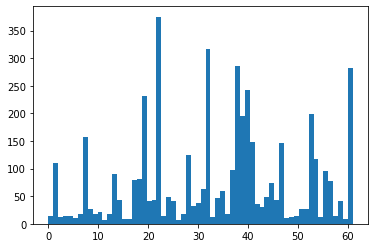

In [15]:
plt.hist(labels, len(set(labels)))
plt.show()

In [16]:
rand_signs = random.sample(range(0,len(labels)), 10)
rand_signs

[2167, 3737, 2821, 715, 3559, 1038, 3389, 2743, 2552, 262]

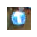

Forma: (26, 26, 3), min:17, max:255


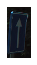

Forma: (238, 108, 3), min:0, max:255


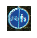

Forma: (74, 70, 3), min:0, max:255


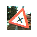

Forma: (107, 105, 3), min:0, max:255


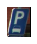

Forma: (88, 68, 3), min:0, max:255


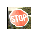

Forma: (218, 230, 3), min:0, max:255


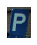

Forma: (103, 76, 3), min:0, max:197


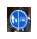

Forma: (48, 45, 3), min:1, max:255


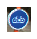

Forma: (86, 80, 3), min:0, max:255


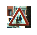

Forma: (93, 100, 3), min:0, max:255


In [17]:
for i in range(len(rand_signs)):
    temp_im = images[rand_signs[i]]
    plt.subplot(1,10,i+1)
    plt.axis("off")
    plt.imshow(temp_im)
    plt.subplots_adjust(wspace=0.5)
    plt.show()
    print("Forma: {0}, min:{1}, max:{2}".format(temp_im.shape,
    temp_im.min(), temp_im.max()))

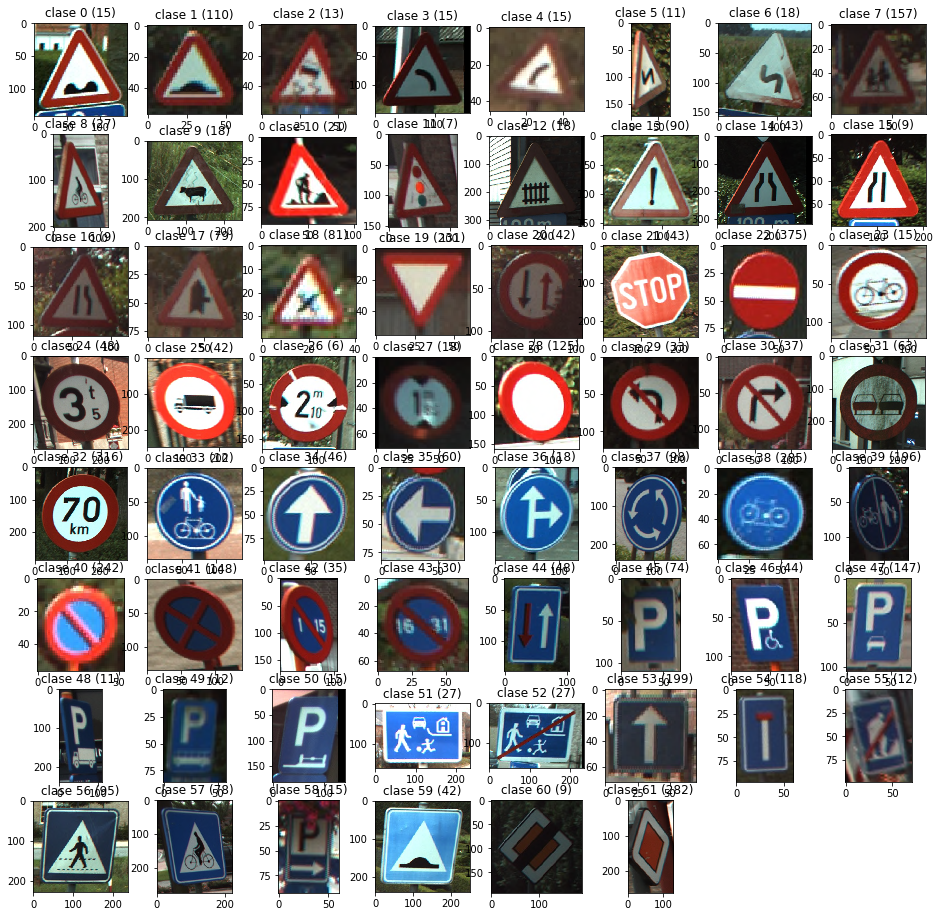

In [18]:
unique_labels = set(labels)
plt.figure(figsize=(16,16))
i= 1
for label in unique_labels:
    temp_im = images[list(labels).index(label)]
    plt.subplot(8, 8, i)
    plt.axis=("off")
    plt.title("clase {0} ({1})".format(label, list(labels).count(label)))
    i +=1
    plt.imshow(temp_im)
plt.show()

In [19]:
from skimage import transform
w=9999
h=9999
for image in images:
    if image.shape[0]<h:
        h = image.shape[0]
    if image.shape[1]<w:
        w = image.shape[1]
print("Tamaño minimo: {0} x {1}".format(h, w))
        

Tamaño minimo: 22 x 20


In [20]:
images30 = [transform.resize(image, (30,30)) for image in images]

In [21]:
images30[0]

array([[[0.72005229, 0.70687582, 0.57784314],
        [0.52505882, 0.40976471, 0.28803922],
        [0.52320261, 0.39620915, 0.28581699],
        ...,
        [0.19869281, 0.22895425, 0.15163399],
        [0.18466667, 0.21152941, 0.14058824],
        [0.18534641, 0.21228758, 0.14169935]],

       [[0.69623529, 0.65879739, 0.53219608],
        [0.49666667, 0.34654902, 0.23752941],
        [0.46705882, 0.32098039, 0.22104575],
        ...,
        [0.18607843, 0.22137255, 0.14294118],
        [0.18980392, 0.22901961, 0.1545098 ],
        [0.19847059, 0.22721569, 0.15901961]],

       [[0.68928105, 0.67254902, 0.53823529],
        [0.50666667, 0.43901961, 0.32901961],
        [0.47941176, 0.40849673, 0.30392157],
        ...,
        [0.18496732, 0.20588235, 0.13333333],
        [0.18823529, 0.22019608, 0.14627451],
        [0.19267974, 0.22366013, 0.15601307]],

       ...,

       [[0.0903268 , 0.12071895, 0.04843137],
        [0.07627451, 0.11058824, 0.0672549 ],
        [0.14052288, 0

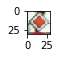

Forma: (30, 30, 3), min:0.08235294117646935, max:0.996078431372549


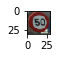

Forma: (30, 30, 3), min:0.07058823529411765, max:0.996078431372549


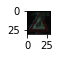

Forma: (30, 30, 3), min:0.00946405228758159, max:0.3326143790849674


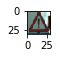

Forma: (30, 30, 3), min:0.053758169934640915, max:0.996078431372549


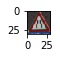

Forma: (30, 30, 3), min:0.060921568627451184, max:0.7604640522875816


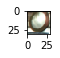

Forma: (30, 30, 3), min:0.0, max:0.996078431372549


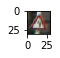

Forma: (30, 30, 3), min:0.04352941176470608, max:0.9458169934640515


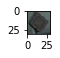

Forma: (30, 30, 3), min:0.062478213507625335, max:0.4888366013071899


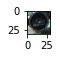

Forma: (30, 30, 3), min:0.023316993464052305, max:0.9735511982570806


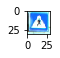

Forma: (30, 30, 3), min:0.034596949891069734, max:1.0


In [22]:
rand_signs = random.sample(range(0,len(labels)), 10)
for i in range(len(rand_signs)):
    temp_im = images30[rand_signs[i]]
    plt.subplot(1,10,i+1)
    plt.axis=("off")
    plt.imshow(temp_im)
    plt.subplots_adjust(wspace=0.5)
    plt.show()
    print("Forma: {0}, min:{1}, max:{2}".format(temp_im.shape,
    temp_im.min(), temp_im.max()))

In [23]:
from skimage.color import rgb2gray
images30 = np.array(images30)
images30 = rgb2gray(images30)

**Paso 1: Definir la red Neuronal**

In [24]:
#Parametros de entrada a la red neuronal
x = tf.placeholder(dtype = tf.float32, shape=[None, 30, 30])

#Parametros de salida
y = tf.placeholder(dtype = tf.int32, shape=[None])

#Capa de entrada a la red neuronal
images_flat = tf.contrib.layers.flatten(x)

#Capa de conexion
logits = tf.contrib.layers.fully_connected(images_flat, 62, tf.nn.relu)

#Funcion de perdidas
loss = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits))

#Funcion de optimizacion
train_opt = tf.train.AdamOptimizer(learning_rate=0.001).minimize(loss)

#Convertir el resultado de la red neuronal a la prediccion
final_pred = tf.argmax(logits,1)

#Ajustar la exactitud del modelo de la red neuronal
accuracy = tf.reduce_mean(tf.cast(final_pred, tf.float32))

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
Use keras.layers.flatten instead.
Instructions for updating:
Please use `layer.__call__` method instead.


In [25]:
images_flat

<tf.Tensor 'Flatten/flatten/Reshape:0' shape=(?, 900) dtype=float32>

In [26]:
logits

<tf.Tensor 'fully_connected/Relu:0' shape=(?, 62) dtype=float32>

**Paso 2: Entrenamiento de la Red Neuronal**

In [27]:
tf.set_random_seed(1234)
sess = tf.Session()
sess.run(tf.global_variables_initializer())

#Ejecutar la red neuronal con un entrenamiento de 500 iteraciones
#Entrenamos la red neuronal en base al valor de Eficacia (accuracy)
for i in range(1501):
    _, accuracy_val = sess.run([train_opt, accuracy], feed_dict={x:images30, y:list(labels)})
    if i%50 == 0:
        print("Eficacia:", accuracy_val)

Eficacia: 15.801093
Eficacia: 34.79694
Eficacia: 35.057487
Eficacia: 34.825356
Eficacia: 34.56612
Eficacia: 34.522404
Eficacia: 34.39082
Eficacia: 34.382515
Eficacia: 34.38448
Eficacia: 34.380764
Eficacia: 34.346012
Eficacia: 34.342075
Eficacia: 34.3294
Eficacia: 34.321747
Eficacia: 34.305138
Eficacia: 34.300766
Eficacia: 34.288742
Eficacia: 34.275192
Eficacia: 34.293987
Eficacia: 34.29661
Eficacia: 34.311695
Eficacia: 34.279343
Eficacia: 34.300545
Eficacia: 34.292896
Eficacia: 34.278034
Eficacia: 34.282185
Eficacia: 34.267323
Eficacia: 34.262512
Eficacia: 34.26011
Eficacia: 34.239124
Eficacia: 34.24721


**Paso 3: Evaluacion de la Red Neuronal**

In [28]:
sample_idx = random.sample(range(len(images30)),20)
sample_images = [images30[i] for i in sample_idx]
sample_labels = [labels[i] for i in sample_idx]

In [29]:
prediction = sess.run([final_pred], feed_dict = {x:sample_images}) [0]

In [30]:
prediction

array([38,  7, 56, 32, 22, 22, 54,  7, 53, 22, 22,  1, 38, 32, 54, 54, 13,
       61, 28, 19], dtype=int64)

In [31]:
sample_labels

[38, 7, 56, 32, 22, 22, 54, 14, 53, 22, 22, 1, 39, 32, 54, 54, 10, 61, 23, 19]

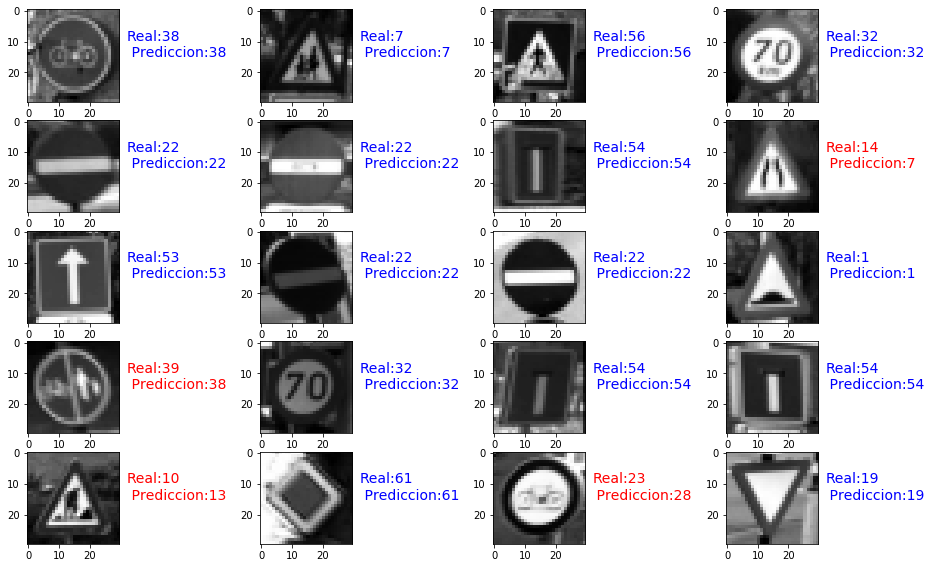

In [32]:
plt.figure(figsize=(16,20))
for i in range(len(sample_images)):
    real = sample_labels[i]
    prediccion = prediction[i]
    plt.subplot(10,4,i+1)
    #plt.axis("off")
    color = "blue"  if real == prediccion else "red"
    plt.text(32,15, "Real:{0}\n Prediccion:{1}".format(real,prediccion),fontsize =14,color=color)
    plt.imshow(sample_images[i], cmap="gray")
plt.show()